In [1110]:
import requests
import pandas as pd
import sys, json
import json
import string
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

url="https://archive.org/advancedsearch.php?q=wuhan&output=json&rows=50000"

In [554]:
response = requests.get(url).json()

In [557]:
response

{'responseHeader': {'status': 0,
  'QTime': 289,
  'params': {'query': '( (title:wuhan^100 OR salients:wuhan^50 OR subject:wuhan^25 OR description:wuhan^15 OR collection:wuhan^10 OR language:wuhan^10 OR text:wuhan^1) )',
   'qin': 'wuhan',
   'fields': '_default_',
   'wt': 'json',
   'rows': '50000',
   'start': 0}},
 'response': {'numFound': 8117,
  'start': 0,
  'docs': [{'backup_location': 'ia907104_31',
    'collection': ['TV-SFGTV', 'tvarchive', 'tvnews'],
    'contributor': 'SFGTV',
    'date': '2020-02-14T00:00:00Z',
    'downloads': 33,
    'format': ['Closed Caption Text',
     'Columbia Fingerprint TV',
     'Columbia Sparse Fingerprint TV',
     'Item Tile',
     'JSON',
     'MP3',
     'MPEG2',
     'Metadata',
     'SubRip',
     'Thumbnail',
     'h.264'],
    'identifier': 'SFGTV_20200214_194500_Mayors_Press_Availability',
    'imagecount': 960,
    'indexflag': ['index', 'nonoindex'],
    'item_size': 403433765,
    'language': 'eng',
    'mediatype': 'movies',
    'm

In [1043]:
response['response']['docs'][1]['date']

'2021-08-02T00:00:00Z'

In [1111]:
dates = [""]*9999
for count,row in enumerate(response['response']['docs']):
    try:
        dates[count]=row['publicdate']
    except:
        try:
            dates[count]=row['date']
        except:
            pass


In [1112]:
dates

['2020-02-14T19:45:00Z',
 '2021-08-02T07:58:00Z',
 '2020-04-01T23:33:36Z',
 '2020-03-07T11:09:49Z',
 '2020-08-12T06:47:28Z',
 '2020-02-12T23:18:30Z',
 '2021-07-20T01:58:54Z',
 '2021-01-07T15:05:18Z',
 '2020-11-17T23:00:00Z',
 '2020-01-11T03:23:21Z',
 '2019-08-29T09:33:01Z',
 '2021-04-02T02:44:28Z',
 '2019-06-15T02:03:49Z',
 '2019-06-21T03:57:48Z',
 '2019-08-21T07:09:56Z',
 '2019-11-22T03:20:46Z',
 '2020-12-10T01:49:12Z',
 '2020-02-12T22:30:00Z',
 '2020-03-13T09:29:00Z',
 '2020-05-06T03:05:18Z',
 '2020-01-30T17:51:38Z',
 '2021-03-14T20:04:20Z',
 '2020-06-17T23:36:36Z',
 '2020-06-04T05:47:44Z',
 '2020-05-07T02:54:11Z',
 '2020-07-07T02:29:56Z',
 '2020-05-14T08:04:01Z',
 '2019-09-15T03:15:49Z',
 '2021-01-20T07:32:11Z',
 '2019-12-31T09:53:46Z',
 '2020-03-05T09:07:00Z',
 '2020-01-24T09:00:00Z',
 '2020-02-08T04:00:00Z',
 '2019-05-10T06:08:22Z',
 '2020-03-10T12:30:00Z',
 '2020-02-02T06:20:00Z',
 '2020-02-02T15:00:00Z',
 '2021-01-28T01:30:00Z',
 '2020-01-23T03:00:00Z',
 '2020-01-24T03:00:00Z',


In [1113]:
dates = [x for x in dates if x]

In [1114]:
dates = [x for x in dates if str(dates[0]) != "0"]

In [1115]:
dates

['2020-02-14T19:45:00Z',
 '2021-08-02T07:58:00Z',
 '2020-04-01T23:33:36Z',
 '2020-03-07T11:09:49Z',
 '2020-08-12T06:47:28Z',
 '2020-02-12T23:18:30Z',
 '2021-07-20T01:58:54Z',
 '2021-01-07T15:05:18Z',
 '2020-11-17T23:00:00Z',
 '2020-01-11T03:23:21Z',
 '2019-08-29T09:33:01Z',
 '2021-04-02T02:44:28Z',
 '2019-06-15T02:03:49Z',
 '2019-06-21T03:57:48Z',
 '2019-08-21T07:09:56Z',
 '2019-11-22T03:20:46Z',
 '2020-12-10T01:49:12Z',
 '2020-02-12T22:30:00Z',
 '2020-03-13T09:29:00Z',
 '2020-05-06T03:05:18Z',
 '2020-01-30T17:51:38Z',
 '2021-03-14T20:04:20Z',
 '2020-06-17T23:36:36Z',
 '2020-06-04T05:47:44Z',
 '2020-05-07T02:54:11Z',
 '2020-07-07T02:29:56Z',
 '2020-05-14T08:04:01Z',
 '2019-09-15T03:15:49Z',
 '2021-01-20T07:32:11Z',
 '2019-12-31T09:53:46Z',
 '2020-03-05T09:07:00Z',
 '2020-01-24T09:00:00Z',
 '2020-02-08T04:00:00Z',
 '2019-05-10T06:08:22Z',
 '2020-03-10T12:30:00Z',
 '2020-02-02T06:20:00Z',
 '2020-02-02T15:00:00Z',
 '2021-01-28T01:30:00Z',
 '2020-01-23T03:00:00Z',
 '2020-01-24T03:00:00Z',


In [1116]:
lastdates=len(dates)
newdates=0
while (newdates != lastdates):
    lastdates=newdates
    for i,row in enumerate(dates):    
        if dates[i][:4] < '2018':
            del dates[i]
            newdates=len(dates)

In [1117]:
len(dates)

7970

In [1118]:
min(dates)

'2018-01-02T03:50:11Z'

In [1119]:
max(dates)

'2021-09-30T10:00:00Z'

In [1120]:
df = pd.DataFrame(dates)
#df = df.value_counts().sort_index()

In [1121]:
df[0] = pd.to_datetime(df[0], dayfirst=True)

df1 = df[0].dt.date.value_counts().sort_index().reset_index()

df1.columns = ['DATE','Count']

In [1122]:
df1['DATE'] = pd.to_datetime(df1['DATE'])

In [1123]:
df1.set_index('DATE', inplace=True)

In [1124]:
df1

Count
DATE             
2018-01-02      1
2018-01-07      1
2018-02-15      1
2018-03-02      1
2018-03-03      1
...           ...
2021-09-26      3
2021-09-27      2
2021-09-28      5
2021-09-29      6
2021-09-30      3

[848 rows x 1 columns]

In [1125]:
print (df1.index)

DatetimeIndex(['2018-01-02', '2018-01-07', '2018-02-15', '2018-03-02',
               '2018-03-03', '2018-04-03', '2018-04-09', '2018-04-22',
               '2018-04-23', '2018-04-25',
               ...
               '2021-09-20', '2021-09-22', '2021-09-23', '2021-09-24',
               '2021-09-25', '2021-09-26', '2021-09-27', '2021-09-28',
               '2021-09-29', '2021-09-30'],
              dtype='datetime64[ns]', name='DATE', length=848, freq=None)


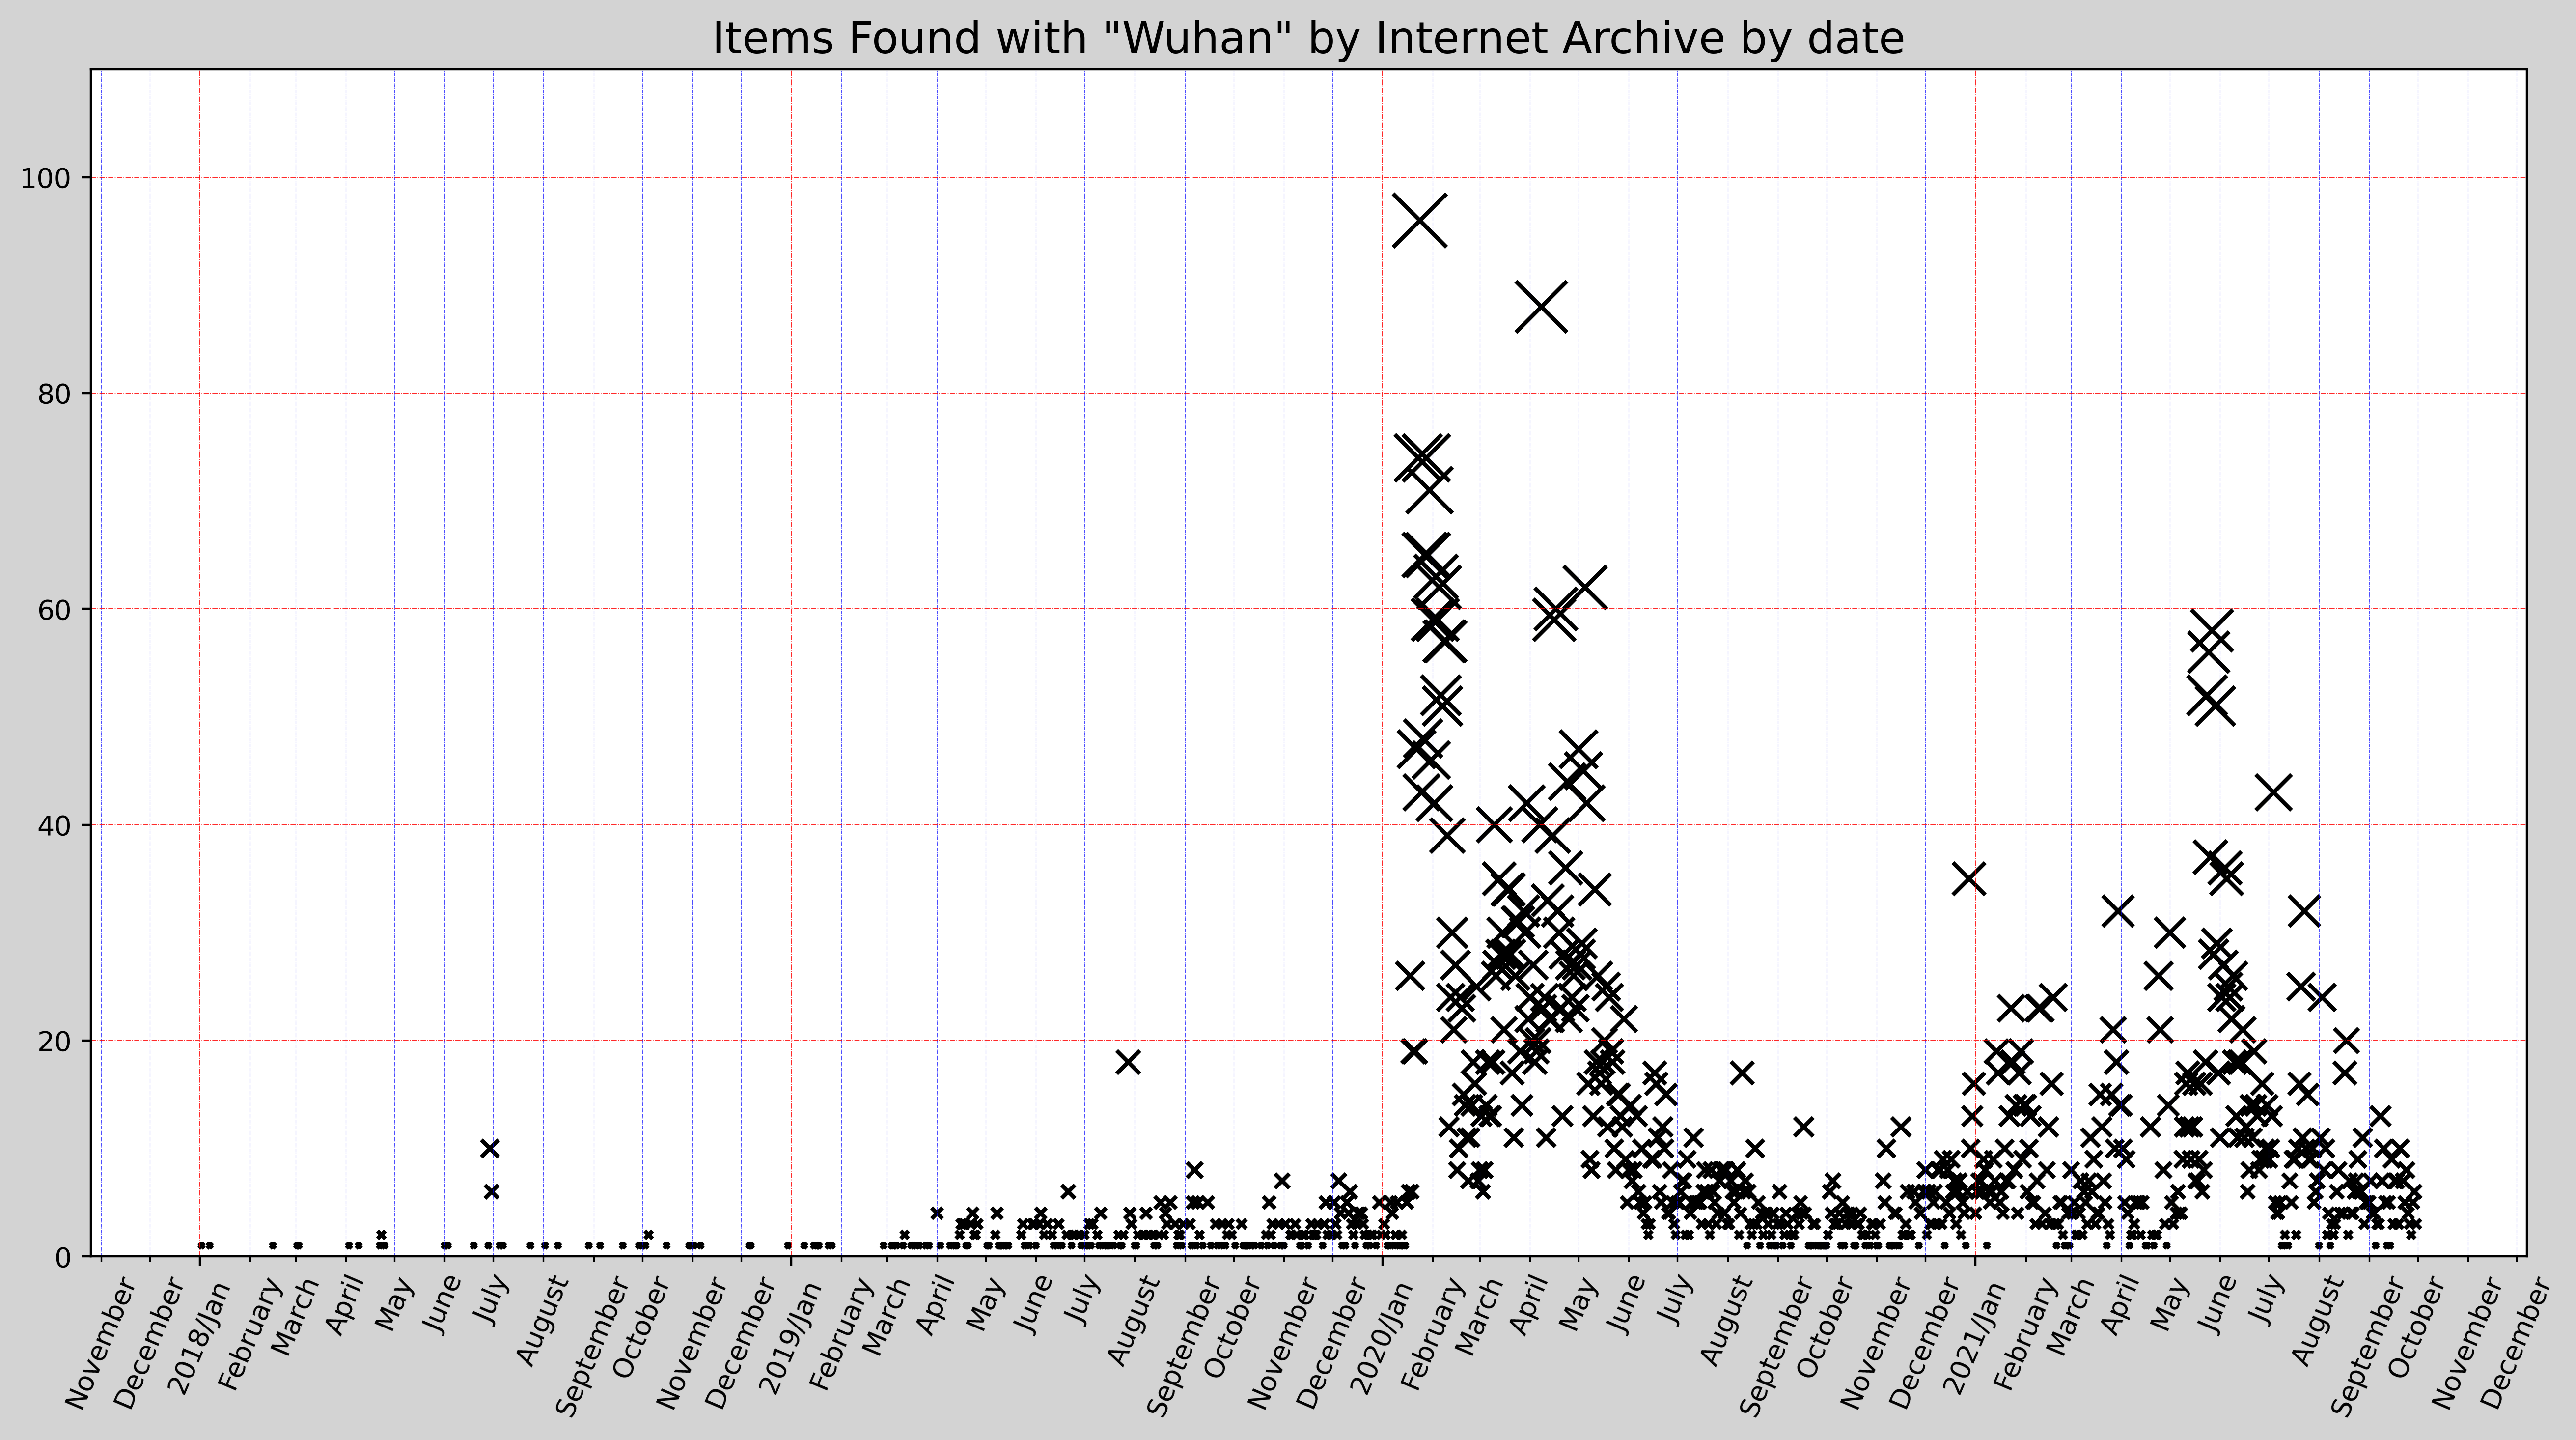

In [1126]:
x = df1.index

y = df1['Count']
fig= plt.figure(figsize=(16, 8), dpi=400,facecolor='lightgray')

plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%B'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gca().tick_params(axis="x", which="both", rotation=67)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%b'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.scatter(x,y,s=y*4,marker='x',color='k')
plt.gca().grid(which='major', color='r', linestyle='-.', linewidth=.3, alpha=1)  
plt.gca().grid(which='minor', color='b', linestyle='-.', linewidth=.2,alpha=.7)
plt.ylim(top=110,bottom=0)
plt.title('Items Found with "Wuhan" by Internet Archive by date',size=16)
plt.show()
plt.close()

In [787]:
df1.reset_index()


DATE  Count
0   2019-01-01     13
1   2019-01-09      1
2   2019-01-15      1
3   2019-01-18      1
4   2019-01-24      1
..         ...    ...
561 2021-09-26      2
562 2021-09-27      1
563 2021-09-28      2
564 2021-09-29      4
565 2021-09-30      1

[566 rows x 2 columns]

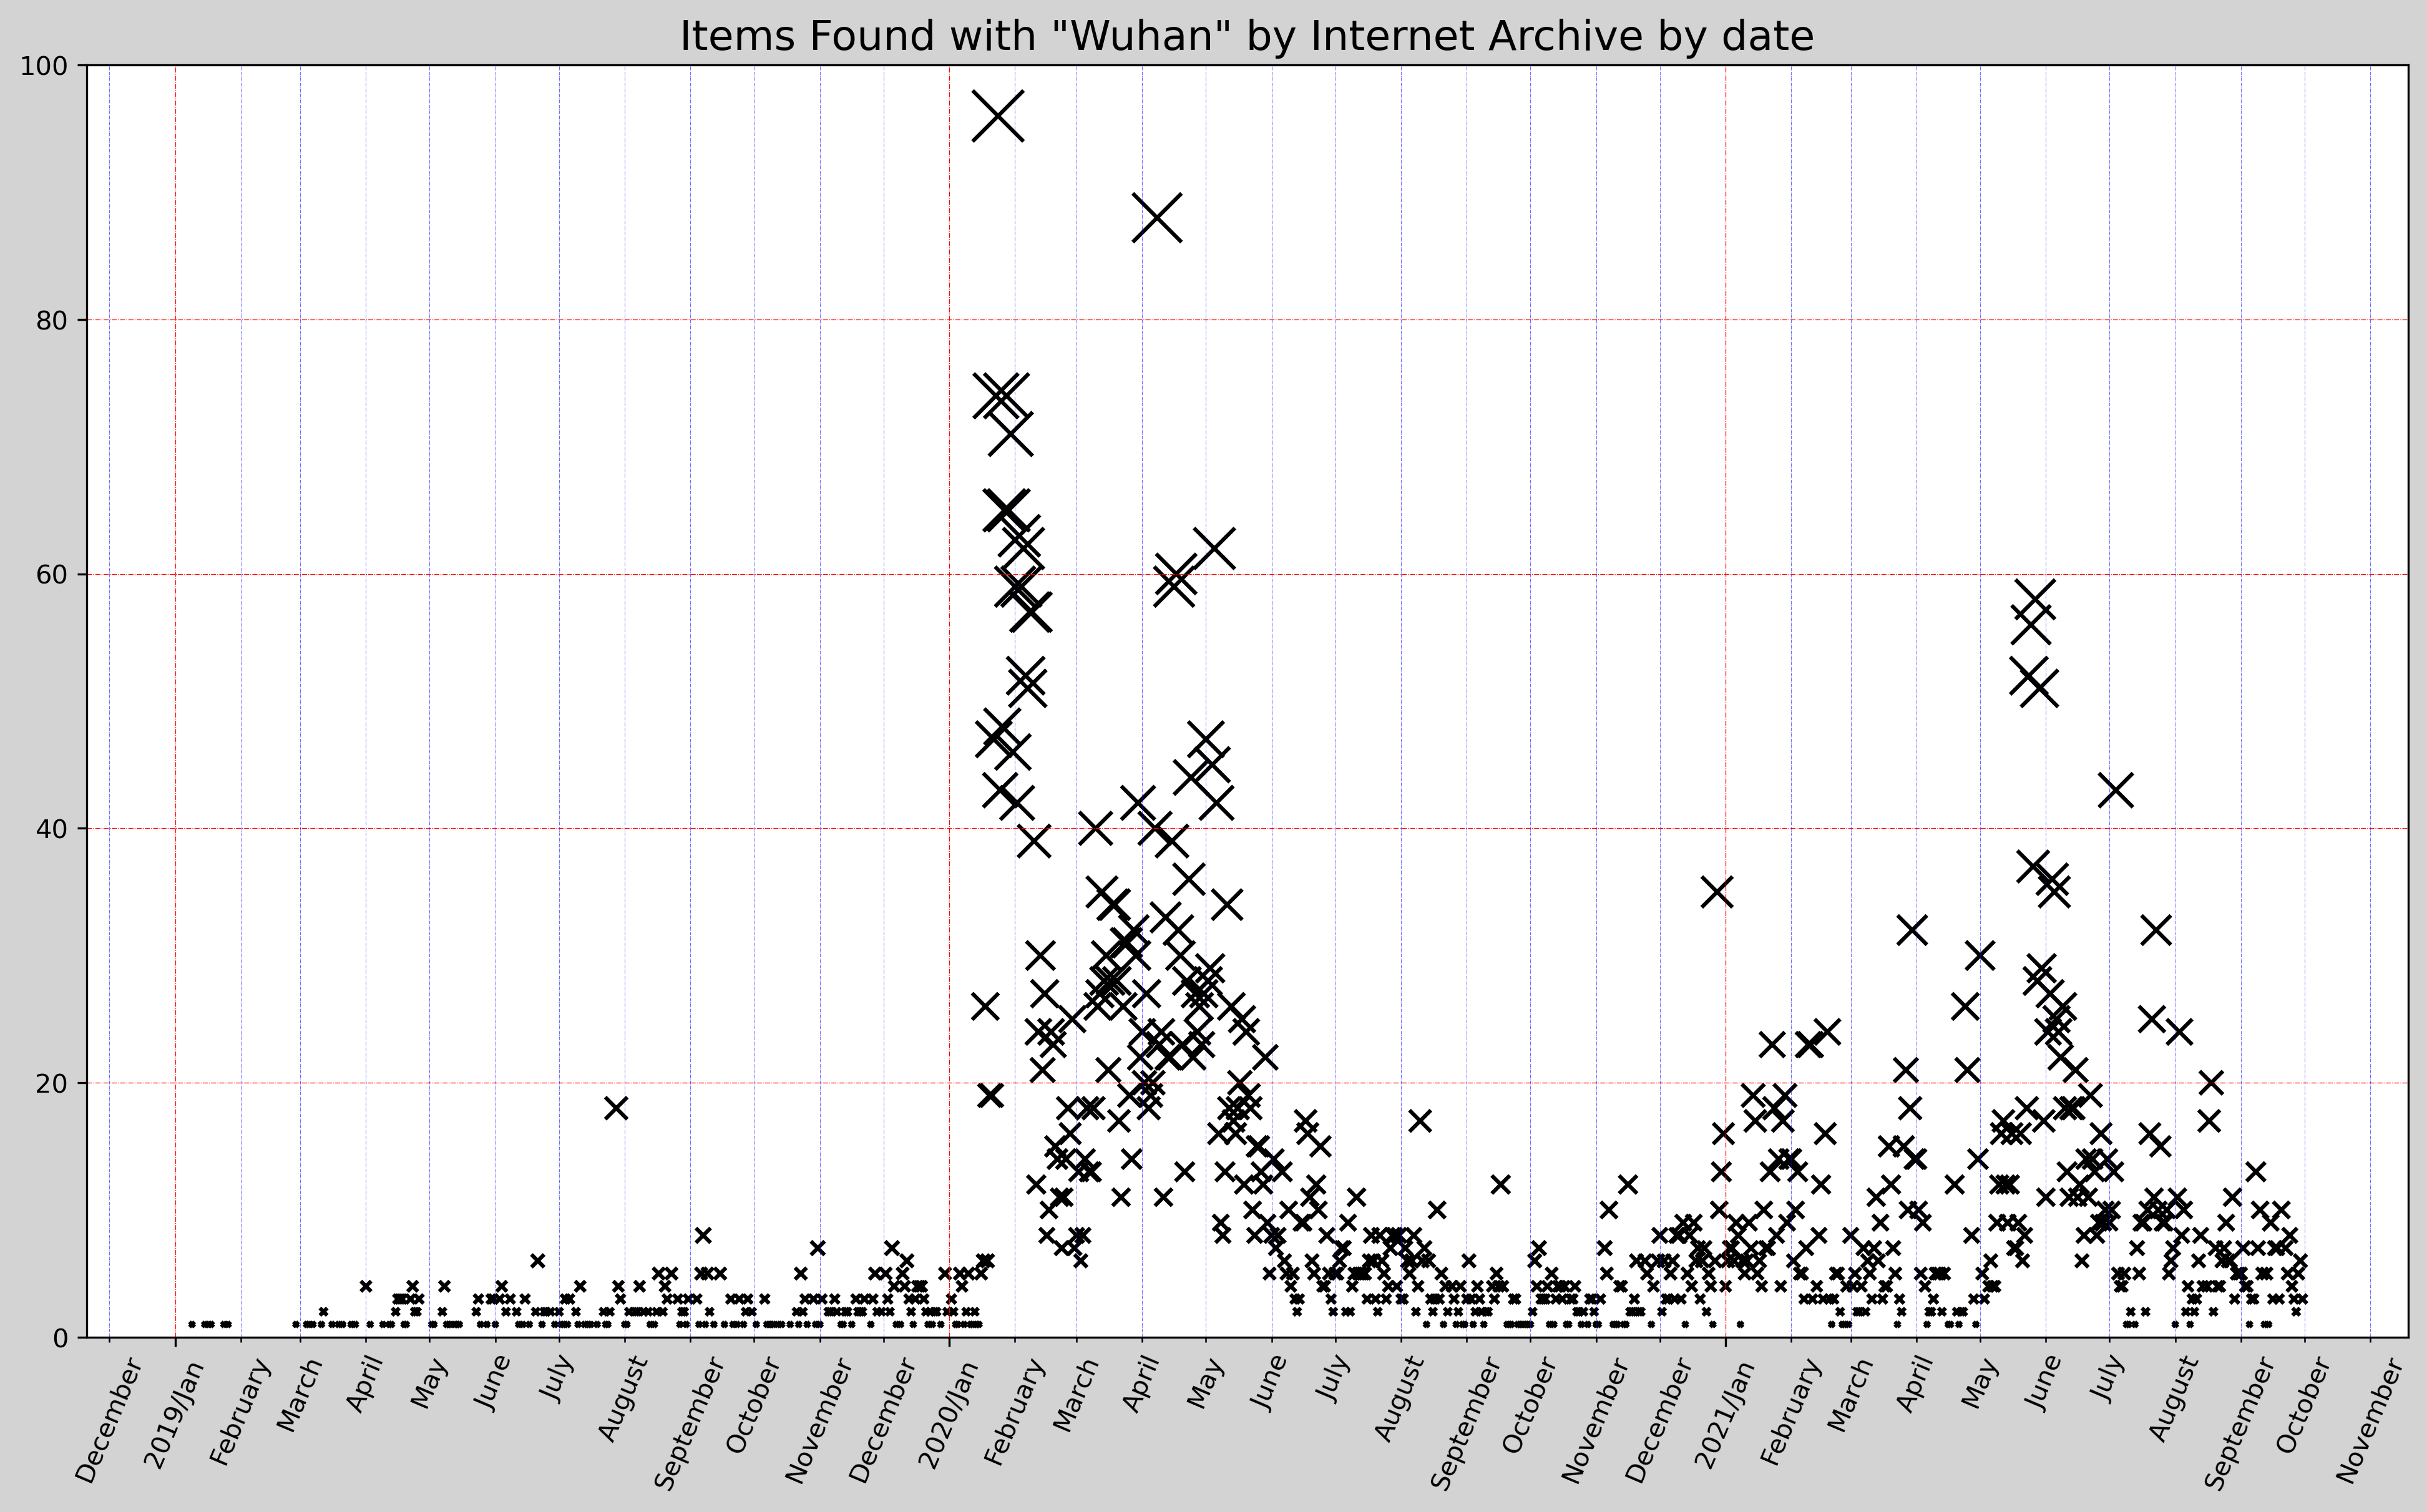

In [1108]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from celluloid import Camera

fig = plt.figure(figsize=(16, 9), dpi=300,facecolor='lightgray')
ax=  fig.gca()
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%B'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.tick_params(axis="x", which="both", rotation=67)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%b'))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.grid(which='major', color='r', linestyle='-.', linewidth=.3, alpha=1)  
ax.grid(which='minor', color='b', linestyle='-.', linewidth=.2,alpha=.7)
ax.set_ylim(top=100,bottom=0)

plt.title('Items Found with "Wuhan" by Internet Archive by date',size=16)

rows = []
a = 0
camera = Camera(fig)
for i,row in df1.iterrows():
    rows=df1[:i]
    ax.scatter(rows['Count'].index,rows['Count'],s=rows['Count']*4,marker='x',color='k')
    camera.snap()

anim = camera.animate(blit=False)

anim.save('scatter.gif',fps=60)

plt.show()
plt.close()